![title](buterr_continents.png)

In [2]:
import community as community_louvain
from collections import defaultdict
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import pandas as pd

### Preprocessing

In [ ]:
df = pd.read_csv("net_global_surf_inOperation.csv", header = None, sep=";")
df.columns = ["source","target","surface"]
G = nx.from_pandas_edgelist(df, source="source",target="target", edge_attr=True, create_using=nx.DiGraph)

In [ ]:
df_nodes = pd.read_csv("ids_to_countries_global_inOperation.csv", sep=";")
df_nodes.columns = ["id","Country"]
df_nodes = df_nodes.set_index("id")

In [ ]:
df_cc = pd.read_csv("countries coordinates.tsv",sep="\t")
df_cc = df_cc.set_index('Country Name')

In [ ]:
missing = []
    
for n in G.nodes():
    countryname = df_nodes["Country"][n]

    if countryname in df_cc.index:
        G.nodes[n]["Lat"] = df_cc["Capital Latitude"][countryname]
        G.nodes[n]["Long"] = df_cc["Capital Longitude"][countryname]
        G.nodes[n]["Continent"] = df_cc["Continent Name"][countryname]
    else:
        missing.append(countryname)
        G.nodes[n]["Lat"] = 0
        G.nodes[n]["Long"] = 0
        
print("Missing:", missing)

In [ ]:
mapping=dict()
for index, row in df_nodes.iterrows():
    mapping[index]=row["Country"]
g = nx.relabel_nodes(G, mapping)

In [4]:
# removing self loops from the graph 
graf.remove_edges_from(list(nx.selfloop_edges(graf)))

In [5]:
# shortening some labels for for visualization purposes
graf = nx.relabel_nodes(graf, {'Russian Federation':"Russia", 
                              'United Kingdom of Great Britain and Northern Ireland':"United Kingdom",
                             "United States of America":"United States",
                             "Egypt, Arab Rep.":"Egypt",
                             "China, Hong Kong Special Administrative Region":"Hong Kong"})

In [2]:
G = nx.read_graphml("land_info.graphml")

# Network analysis

In [3]:
graf = nx.read_graphml("butterfly_prova.graphml")

### Degree Analysis

We ivestigate if the the land acquisition network displays a free-scale property, by comparing the empirical degre distribution of the network under study with that of the random network defind as G(N, p), where N=142 and p=density of the directed network.

In [3]:
# average degree
sum([i[1] for i in list(nx.degree(graf))])/graf.order()

8.788732394366198

In [4]:
density = nx.density(graf)
p = density
print('Density for a directed graph: {}'.format(density))

Density for a directed graph: 0.03116571771051843


In [4]:
# If the graph was undirected the density would be double.
G_un = graf.to_undirected()
nx.is_connected(G_un)

True

In [9]:
print('Density for an undirected graph: {}'.format(nx.density(G_un)))

Density for an undirected graph: 0.06193187493756867


Before plotting the distribution we could analytically compute point statistics of the degree distribution and verify the conditions suggesting a right-skewed distribution. In fact, both average in-degree and out-degree exceeds the median degree. Also the variablity of the degree is significantly high, confirming the scale-free property of the network.

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF
degree = list(dict(graf.degree()).values())
indegree = list(dict(graf.in_degree()).values())
outdegree = list(dict(graf.out_degree()).values())

print(f"Average degree: {np.mean(degree)}")
print(f"Mean in/out degree: {np.mean(indegree)}")
print(f"Std. degree: {np.std(degree)}\nStd. indegree: {np.std(indegree)}\nStd outdegree: {np.std(outdegree)}")
print(f"Median degree: {np.median(degree)}\nMedian indegree: {np.median(indegree)}\nMedian outdegree: {np.median(outdegree)}")
print(f"Min indegree: {np.min(indegree)}\nMin outdegree: {np.min(outdegree)}")
print(f"Max degree: {np.max(degree)}\nMax indegree: {np.max(indegree)}\nMax outdegree: {np.max(outdegree)}")

Average degree: 8.788732394366198
Mean in/out degree: 4.394366197183099
Std. degree: 9.072346922096074
Std. indegree: 5.761648026266068
Std outdegree: 8.124001777448361
Median degree: 5.5
Median indegree: 2.0
Median outdegree: 1.0
Min indegree: 0
Min outdegree: 0
Max degree: 49
Max indegree: 23
Max outdegree: 42


#### Random network model

In [6]:
random_graph = nx.fast_gnp_random_graph(graf.order(),p, directed=True)
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))
random_degree = list(dict(random_graph.degree()).values())
random_indegree = list(dict(random_graph.in_degree()).values())
random_outdegree = list(dict(random_graph.out_degree()).values())

Number of nodes: 142
Number of links: 627


In [118]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

cdfin = ECDF(indegree)
xin = np.unique(indegree)
yin = cdfin(xin)

cdfout = ECDF(outdegree)
xout = np.unique(outdegree)
yout = cdfout(xout)

In [119]:
dran=pd.DataFrame({"x_r":x_random, "y_r":y_random})
d=pd.DataFrame({"x":x, "y":y})
din=pd.DataFrame({"xin":xin, "yin":yin})
dout =pd.DataFrame({"xout":xout, "yout":yout} )

### Plotting degree distribution
For a given network plotting the emirical degree distribution as probability density function is already informative, since we don't have orders of magnitude of difference between the degree of the smallest and largest nodes. The empirical degree distribution exhibits a heavy tail which is not observed in a random network. We also plot the cumulative complementary density function on log log scale which is the more apppropriate for large networks, just to show there exist a region with a positive probability to observe high degree nodes. We didn't expect to have a straght line, since it characterizes only a perfect power law function.

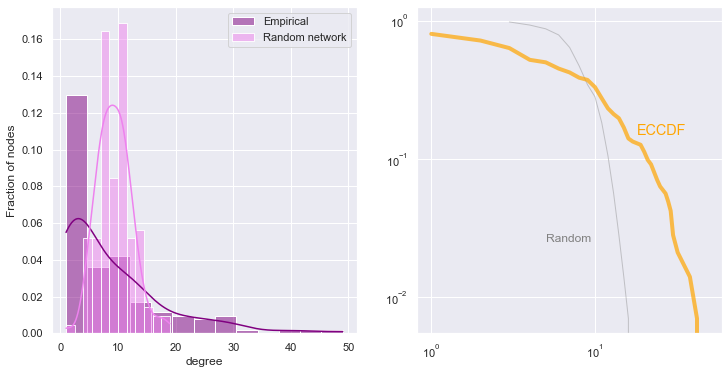

In [121]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(data=df, x="Total degree", kde=True, color="purple",label="Empirical",ax=axs[0], stat="density")
sns.histplot(data=df, x="random", kde=True, color="violet", label="Random network",ax=axs[0], stat="density")
axs[1].loglog(dran['x_r'], 1-dran["y_r"], marker='', color='grey', linewidth=1, alpha=0.4)
axs[1].loglog(d['x'], 1-d['y'], marker='', color='orange', linewidth=4, alpha=0.7)
axs[1].text(18, 0.15, 'ECCDF', horizontalalignment='left', size='large', color='orange')
axs[1].text(5, 0.025, 'Random', horizontalalignment='left', size='medium', color='grey')

axs[0].legend()
axs[0].set_ylabel("Fraction of nodes")
plt.savefig("Degree total Distribution.png")

Text(0, 0.5, 'Fraction of nodes')

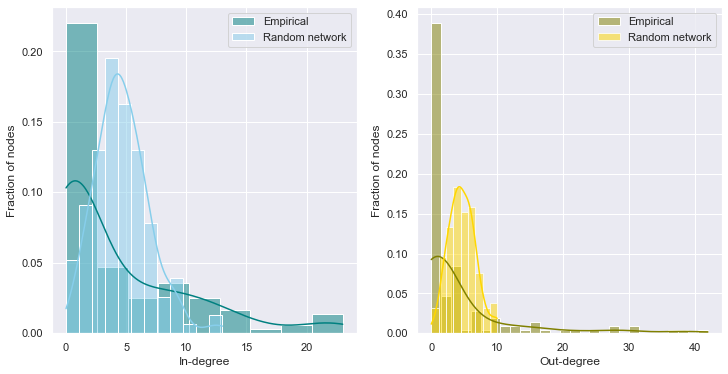

In [111]:
df =pd.DataFrame({"Total degree":degree,"In-degree":indegree, "Out-degree":outdegree,"random":random_degree, "random_in":random_indegree, "random_out":random_outdegree})
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(data=df, x="In-degree", kde=True, color="teal",label="Empirical",ax=axs[0], stat="density")
sns.histplot(data=df, x="random_in", kde=True, color="skyblue", label="Random network",ax=axs[0], stat="density")
sns.histplot(data=df, x="Out-degree",  kde=True, color="olive", label="Empirical",ax=axs[1],  stat="density")
sns.histplot(data=df, x="random_out",  kde=True, color="gold",label="Random network", ax=axs[1], stat="density")
axs[0].legend()
axs[1].legend()
axs[0].set_ylabel("Fraction of nodes")
axs[1].set_ylabel("Fraction of nodes")
#plt.savefig("Degree Distribution.png")

## Degree assortativity
The network exhibit a general disassortative tendency:
Low degree nodes tend to connect with neighbours with a
high average degree, and the other way around. 

In [7]:
# Degree assortativity for all graph
# same as nx.degree_pearson_correlation_coefficient(G_un)

print("Degree assortativity", nx.degree_assortativity_coefficient(nx.to_undirected(graf)))
combinations =  [("out","out"), ("out","in"), ("in","out") , ("in","in") ]
for combo in combinations:
    print(combo[0],combo[1])
    print(nx.degree_assortativity_coefficient(graf, x=combo[0], y=combo[1]))


Degree assortativity -0.23684703647304656
out out
0.04696261859340338
out in
-0.1437416471823733
in out
-0.01881263542184692
in in
-0.026325305031897887


## Clustering

In [23]:
# Tendency to complete relational triads
nx.transitivity(G_un)
# Average local clustering coefficient
nx.average_clustering(G_un)
np.std(list(nx.clustering(G_un).values()))

0.1386578449905482

### Average local clustering coefficient as a function of node degree

In [37]:
nn_cl = defaultdict(list)
degree = nx.degree(graf)
for node, ave_knn in nx.clustering(G_un).items():
    k = degree[node] 
    nn_cl[k]+=[ave_knn]

In [38]:
for node, values in nn_cl.items():
    nn_cl[node]= np.mean(values)

In [43]:
dic = dict()
for x, y in sorted(list(nn_cl.items()), key= lambda x:x[0]):
    dic[x]=y
dt = pd.DataFrame(dic.items(), index=dic.keys(), columns=["Degree k", "Clustering coefficient"])

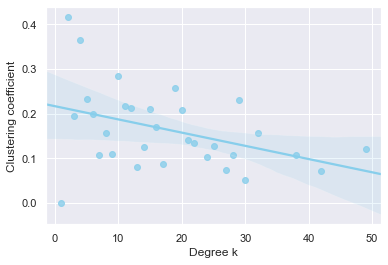

In [45]:
# Clustering coefficient seem to depend negatively from degree of a node. This is tipical to hierarchical networks
sns.set(style="darkgrid")
ax = sns.regplot(x="Degree k", y="Clustering coefficient", color="Skyblue", ci=95, truncate=False, data=dt )
plt.savefig("Clust_coeff_degree.png")

## Strength of interactions in terms of the amount of land acquired

In [ ]:
# Define new attribute, quantifying strength of a state in terms of a sum of hectares acquired/sold
S = defaultdict(lambda : defaultdict(int))
for src, target, data in graf.edges(data=True):
    S[src]["strength_out"] +=data["surface"]
    S[target]["strength_in"] +=data["surface"]
for node in S.keys():
    S[node]["strength"] = S[node]["strength_in"]+S[node]["strength_out"]
nx.set_node_attributes(graf, S)

In [13]:
# normalizing "surface" edge attribute for visualization purpose 
surface = []
for src, target, data in graf.edges(data=True):
    surface.append(data["surface"])
x=np.array(surface)
y = (x - np.min(x)) / (np.max(x) - np.min(x))

In [14]:
surf=list(y)

In [15]:
for i, data in enumerate(graf.edges()):
    src, target = data
    if graf.has_edge(src, target):
        graf[src][target]["std_surface"]=surf[i]

## Global network connectivity
We have only one weakly connected component but 131 different strongly connected components, mainly consisting of a single state, with exception of the Asian continent, which represents the largest strongly connected component.

In [44]:
nx.number_strongly_connected_components(graf)
[scc for scc in nx.strongly_connected_components(graf) if len(scc)>1]

[{'China',
  'India',
  'Indonesia',
  'Kazakhstan',
  'Lao PDR',
  'Malaysia',
  'Russia',
  'Sri Lanka',
  'Thailand',
  'Ukraine',
  'Vietnam'},
 {'Guatemala', 'Nicaragua'}]

## BOW-TIE DECOMPOSITION
https://github.com/jeroenvldj/bow-tie_detection
https://www.researchgate.net/profile/Lily_Popova_Zhuhadar/publication/252027520_Bow-tie_decomposition_in_directed_graphs/links/5b3477580f7e9b0df5d2987f/Bow-tie-decomposition-in-directed-graphs.pdf

In [5]:
import bowtie_detection as bow
SCC, IN, OUT, TUBES, INTENDRILS, OUTTENDRILS, OTHER = bow.get_bowtie_components(graf)
bow_tie = dict({"SCC":SCC, "IN":IN, "OUT":OUT, "TUBES":TUBES, "INTENDRILS":INTENDRILS,"OUTTENDRILS":OUTTENDRILS, "OTHER":OTHER})
bow_tie_decomposition = dict()
for key, values in bow_tie.items():
    for state in values:
        bow_tie_decomposition[state]=key
#nx.set_node_attributes(graf, bow_tie_decomposition, "bow_tie_component")

In [6]:
N = graf.order()
for comp, values in bow_tie.items():
    print(comp, round((len(values)/N)*100, 1) ,"%")

SCC 7.7 %
IN 23.9 %
OUT 35.2 %
TUBES 4.2 %
INTENDRILS 15.5 %
OUTTENDRILS 12.0 %
OTHER 1.4 %


In [7]:
#interaction within components
for key, values in bow_tie.items():
    print(key, nx.density(nx.subgraph(graf, values)))

SCC 0.24545454545454545
IN 0.00267379679144385
OUT 0.017551020408163264
TUBES 0.03333333333333333
INTENDRILS 0.006493506493506494
OUTTENDRILS 0
OTHER 0


In [10]:
# Number of deals settled between the components
I = defaultdict(lambda : defaultdict(int))
for edge in graf.edges:
    src, target = edge
    I[graf.nodes[src]["bow_tie_component"]][graf.nodes[target]["bow_tie_component"]] +=1
    
for key, dictionary in I.items():
    for k in ["SCC", "IN","OUT","INTENDRILS", "OUTTENDRILS", "TUBES","OTHER"]:
        if k not in dictionary.keys():
            I[key][k]=0  

In [11]:
pd.DataFrame(I).T # Number of deals settled (inter-intra component interactions)

,OUT,SCC,IN,INTENDRILS,OUTTENDRILS,TUBES,OTHER
SCC,65,27,0,0,0,0,0
IN,249,84,3,54,0,20,0
OUT,43,0,0,0,0,0,0
OUTTENDRILS,42,0,0,6,0,3,0
TUBES,19,0,0,3,0,1,0
INTENDRILS,0,0,0,3,0,0,0
OTHER,0,0,0,2,0,0,0


In [12]:
M = np.matrix(pd.DataFrame(I).T)
m = np.hstack((M,np.sum(M, axis=1)))
mat = np.vstack((m, np.sum(m,axis=0)))
distr_invest = ((mat/624)*100).round(1)

In [13]:
# Percentage of total number of international land deals
pd.DataFrame(distr_invest,
             index=["SCC", "OUT","IN","TUBES","INTENDRILS", "OUTTENDRILS", "OTHER", "Total"],
            columns=["OUT","SCC","IN","INTENDRILS", "OUTTENDRILS", "TUBES","OTHER", "Total"])

,OUT,SCC,IN,INTENDRILS,OUTTENDRILS,TUBES,OTHER,Total
SCC,10.4,4.3,0.0,0.0,0.0,0.0,0.0,14.7
OUT,39.9,13.5,0.5,8.7,0.0,3.2,0.0,65.7
IN,6.9,0.0,0.0,0.0,0.0,0.0,0.0,6.9
TUBES,6.7,0.0,0.0,1.0,0.0,0.5,0.0,8.2
INTENDRILS,3.0,0.0,0.0,0.5,0.0,0.2,0.0,3.7
OUTTENDRILS,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5
OTHER,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.3
Total,67.0,17.8,0.5,10.9,0.0,3.8,0.0,100.0


In [14]:
# Hectares of land exchanged between components
A = defaultdict(lambda : defaultdict(int))
for src, target, data in graf.edges(data=True):
    A[graf.nodes[src]["bow_tie_component"]][graf.nodes[target]["bow_tie_component"]] +=data["surface"]
len(A)
for key, dictionary in A.items():
    for k in ["SCC", "IN","OUT","INTENDRILS", "OUTTENDRILS", "TUBES","OTHER"]:
        if k not in dictionary.keys():
            A[key][k]=0  
pd.DataFrame(A).T

,OUT,SCC,IN,INTENDRILS,OUTTENDRILS,TUBES,OTHER
SCC,5957575,8509838,0,0,0,0,0
IN,17627054,14386852,7482,4346664,0,657269,0
OUT,3191608,0,0,0,0,0,0
OUTTENDRILS,2935124,0,0,46022,0,131168,0
TUBES,1428134,0,0,15780,0,11000,0
INTENDRILS,0,0,0,25590,0,0,0
OTHER,0,0,0,3000,0,0,0


In [15]:
a = np.matrix(pd.DataFrame(A).T)
a_inter = np.hstack((a,np.sum(a, axis=1)))
a_tot = np.vstack((a_inter, np.sum(a_inter,axis=0)))
distr_hectars = ((a_tot/59280160)*100).round(1)
pd.DataFrame(distr_hectars,
             index=["SCC","IN", "OUT","OUTTENDRILS","TUBES","INTENDRILS",  "OTHER", "Total"],
            columns=["OUT","SCC","IN","INTENDRILS", "OUTTENDRILS", "TUBES","OTHER", "Total"])

,OUT,SCC,IN,INTENDRILS,OUTTENDRILS,TUBES,OTHER,Total
SCC,10.0,14.4,0.0,0.0,0.0,0.0,0.0,24.4
IN,29.7,24.3,0.0,7.3,0.0,1.1,0.0,62.5
OUT,5.4,0.0,0.0,0.0,0.0,0.0,0.0,5.4
OUTTENDRILS,5.0,0.0,0.0,0.1,0.0,0.2,0.0,5.3
TUBES,2.4,0.0,0.0,0.0,0.0,0.0,0.0,2.5
INTENDRILS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OTHER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,52.5,38.6,0.0,7.5,0.0,1.3,0.0,100.0


In [27]:
# Degree correlation function at the component level
knn_IN_SCC = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='out', target='in', nodes=IN.union(SCC))).items(), columns=["Out-degree k", "Knn degree"])
knn_SCC_OUT = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='in+out', target='in+out', nodes=OUT.union(SCC))).items(), columns=["Total degree k", "Knn degree"])
knn_IN_OUT = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='out', target='in', nodes=IN.union(OUT))).items(), columns=["Out-degree k", "Knn in-degree"])
knn_TUBES = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='out', target='in', nodes=IN.union(TUBES))).items(), columns=["Out-degree k", "Knn in-degree"])

<ipython-input-27-13521611d212>:2: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_IN_SCC = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='out', target='in', nodes=IN.union(SCC))).items(), columns=["Out-degree k", "Knn degree"])
<ipython-input-27-13521611d212>:3: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_SCC_OUT = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='in+out', target='in+out', nodes=OUT.union(SCC))).items(), columns=["Total degree k", "Knn degree"])
<ipython-input-27-13521611d212>:4: DeprecationWarning: k_nearest_neighbors function is deprecated and will be removed in v3.0.
Use `average_degree_connectivity` instead.
  knn_IN_OUT = pd.DataFrame(dict(nx.k_nearest_neighbors(graf, source='out', target='in', nodes=IN.union(OUT))).items(), columns=["Out-degree k", "Knn in-degree

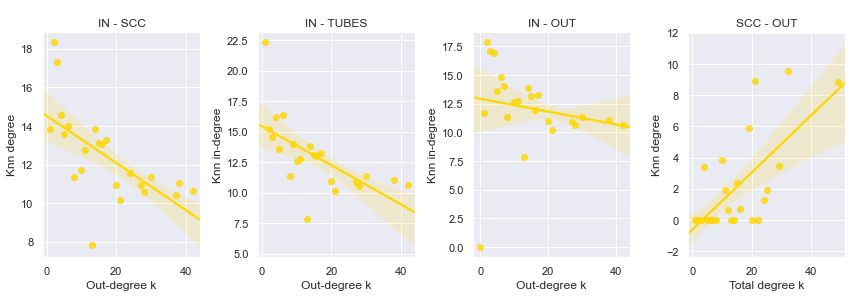

In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,4, figsize=(12, 4))
sns.regplot(x="Out-degree k", y="Knn degree", color="gold", ci=90, truncate=False, data=knn_IN_SCC, ax=axs[0])
sns.regplot(x="Total degree k", y="Knn degree", color="gold", ci=90, truncate=False, data=knn_SCC_OUT, ax=axs[3])
sns.regplot(x="Out-degree k", y="Knn in-degree", color="gold", ci=90, truncate=False, data=knn_IN_OUT, ax=axs[2])
sns.regplot(x="Out-degree k", y="Knn in-degree", color="gold", ci=90, truncate=False, data=knn_TUBES, ax=axs[1])
plt.tight_layout()
axs[2].set_title('\nIN - OUT')
axs[0].set_title('IN - SCC')
axs[3].set_title('SCC - OUT')
axs[1].set_title('IN - TUBES')
plt.savefig("Degree_correlation_knn.png")


In [15]:
print(nx.degree_assortativity_coefficient(graf, x='out', y='in', nodes=IN.union(SCC)))
print(nx.degree_assortativity_coefficient(graf, nodes=SCC.union(OUT)))
print(nx.degree_assortativity_coefficient(graf, x='out', y='in', nodes=IN.union(OUT)))
print(nx.degree_assortativity_coefficient(graf, x='out', y='in', nodes=IN.union(TUBES)))

-0.18748467918913087
-0.016799726752158704
-0.09490278373045462
-0.13366009143610455


### Global centrality & main traders

In [60]:
# SELLERS
percentile_95 = np.percentile(indegree,95)
print(percentile_95)
hubs_indegree = [k for k,v in dict(graf.in_degree()).items() if v>= percentile_95]
print("Major sellers: ",  *hubs_indegree, sep=", ")

15.949999999999989
Major sellers: , Russia, Argentina, Brazil, Zambia, Romania, Ukraine, Ghana, Mozambique


In [61]:
# BUYERS
percentile_95 = np.percentile(outdegree,95)
print(percentile_95)
hubs_outdegree = [k for k,v in dict(graf.out_degree()).items() if v>= percentile_95]
print("Major buyers: ", *hubs_outdegree, sep=", ")

23.849999999999966
Major buyers: , India, China, Canada, Singapore, United States, France, Netherlands, United Kingdom


In [310]:
degree_centrality = nx.degree_centrality(graf)
in_degree_centrality = nx.in_degree_centrality(graf)
out_degree_centrality = nx.out_degree_centrality(graf)
betweenness_centrality = nx.betweenness_centrality(graf)
closeness_centrality = nx.closeness_centrality(graf)
hub_indegree = sorted(in_degree_centrality.items(),key = lambda x:x[1], reverse=True)[:10]
hub_outdegree = sorted(out_degree_centrality.items(),key = lambda x:x[1], reverse=True)[:10]
hub_degree = sorted(degree_centrality.items(),key = lambda x:x[1], reverse=True)[:10]
hub_betweenness = sorted(betweenness_centrality.items(),key = lambda x:x[1], reverse=True)[:10]
hub_closeness = sorted(closeness_centrality.items(),key = lambda x:x[1], reverse=True)[:10]
print('Top 10 indegree:     ',*[elem[0] for elem in hub_indegree]) #greatest supplier
print('Top 10 outdegree:    ',*[elem[0] for elem in hub_outdegree]) #greatest investor
print('Top 10 degree:      ',*[elem[0] for elem in hub_degree]) #greatest actor
print('Top 10 betweenness: ',*[elem[0] for elem in hub_betweenness]) # main intermediary
print('Top 10 closeness:   ',*[elem[0] for elem in hub_closeness]) # best reach

Top 10 indegree:      Romania Ukraine Brazil Ghana Russia Mozambique Argentina Zambia Uganda Congo, Dem. Rep.
Top 10 outdegree:     United Kingdom United States China Canada Netherlands Singapore France India Australia Japan
Top 10 degree:       China United Kingdom United States India Canada Netherlands Brazil Singapore France Russia
Top 10 betweenness:  India Thailand China Malaysia Ukraine Russia Indonesia South Africa Philippines Brazil
Top 10 closeness:    Zambia Mozambique Ghana Brazil Sudan Ukraine Nigeria Romania Russia Sierra Leone


###  Continent level statistics

In [21]:
continents = set(data["Continent"] for node, data in graf.nodes.data())

In [22]:
from collections import defaultdict
Continent_group = defaultdict(list)
for node, data in graf.nodes.data():
        if data["Continent"]== "Central America":
            graf.nodes[node]["Continent"] = "North America"
        Continent_group[data["Continent"]].append(node)

In [23]:
Continent_group.keys()

dict_keys(['Asia', 'Europe', 'North America', 'South America', 'Africa', 'Australia'])

Different behaviour emerges from the analysis of intra continental interactionsamong states. In general the level of economic activity is not particulary high among states of the same continent. To estimate the level of economic transactions within a continent we rely more on the transitivity rather than on the average degree. The asiatic continent displays remarkably higher level of tranitivity compared to the remaining continents, indicating a high level of transactions among the asiatic states. 

In [69]:
for Continent, countries in Continent_group.items():
    sub = nx.subgraph(G_un, countries)
    print(Continent, "N.nodes:", sub.order(), "N.edges:", sub.size())
    print("Average degree:", sum([i[1] for i in list(nx.degree(sub))])/sub.order())
    print("Transitivity:", nx.transitivity(sub))
    print(Continent, "triangles :",
          sum(nx.triangles(sub).values()),
          *sorted([i for i in nx.triangles(sub).items() if i[1]>0], key = lambda x: -x[1]))
    
    print("------------------------------------")
    

Asia N.nodes: 30 N.edges: 59
Average degree: 3.933333333333333
Transitivity: 0.42091836734693877
Asia triangles : 165 ('China', 22) ('Vietnam', 21) ('Malaysia', 17) ('Japan', 15) ('Lao PDR', 15) ('Singapore', 13) ('India', 12) ('Cambodia', 10) ('Thailand', 10) ('Indonesia', 9) ('Hong Kong', 8) ('Myanmar', 5) ('Philippines', 4) ('Republic of Korea', 3) ('Kazakhstan', 1)
------------------------------------
Europe N.nodes: 37 N.edges: 52
Average degree: 2.810810810810811
Transitivity: 0.008108108108108109
Europe triangles : 3 ('Russia', 1) ('Lithuania', 1) ('Germany', 1)
------------------------------------
Africa N.nodes: 45 N.edges: 38
Average degree: 1.6888888888888889
Transitivity: 0.1534090909090909
Africa triangles : 27 ('Kenya', 4) ('South Africa', 4) ('Mauritius', 3) ('Mozambique', 3) ('Zimbabwe', 2) ("Cote d'Ivoire", 2) ('Uganda', 2) ('Liberia', 1) ('Sudan', 1) ('Egypt', 1) ('Nigeria', 1) ('Zambia', 1) ('South Sudan', 1) ('Ghana', 1)
------------------------------------
Australi

In [8]:
# searching for reciprocated edges
for edge in G_un.edges():
    src, target = edge
    if (graf.has_edge(src, target)) & (graf.has_edge(target, src)):
        print(edge)

('China', 'Indonesia')
('India', 'Sri Lanka')
('Thailand', 'Lao PDR')
('Nicaragua', 'Guatemala')


## Deals among continents

In [231]:
from collections import defaultdict
contlink =  defaultdict(lambda : defaultdict(int))
for src,target, data in graf.edges(data=True):
    contlink[graf.nodes[target]["Continent"]]["deal"]+=1
    contlink[graf.nodes[target]["Continent"]]["surface"]+= data["surface"]    

In [255]:
con = np.matrix(pd.DataFrame(contlink).T)
pd.DataFrame(np.around(con/np.sum(con,axis=0),3)*100, index = contlink.keys(), columns=["Deals %", "Surface %"])

,Deals %,Surface %
Asia,16.5,10.3
South America,15.5,16.6
Africa,49.5,39.6
North America,4.3,0.7
Europe,13.0,30.8
Australia,1.1,1.9


## Attribute assortativity

In [32]:
nx.attribute_assortativity_coefficient(graf, "Continent" )

0.16424537863796515

In [42]:
pd.DataFrame(np.around(nx.attribute_mixing_matrix(nx.to_undirected(graf), attribute="Continent", normalized=True,
            mapping ={ 'Africa':0,'South America':1,'North America':2,'Asia':3,'Europe':4,'Australia':5}), 2),
            columns = {'Africa':0,'South America':1,'North America':2,'Asia':3,'Europe':4,'Australia':5},
            index = {'Africa':0,'South America':1,'North America':2,'Asia':3,'Europe':4,'Australia':5} )

,Africa,South America,North America,Asia,Europe,Australia
Africa,0.06,0.01,0.03,0.07,0.10,0.01
South America,0.01,0.02,0.02,0.02,0.03,0.00
North America,0.03,0.02,0.02,0.01,0.02,0.00
Asia,0.07,0.02,0.01,0.10,0.04,0.01
Europe,0.10,0.03,0.02,0.04,0.08,0.00
Australia,0.01,0.00,0.00,0.01,0.00,0.00


In [261]:
# nx.attribute_mixing_dict(graf, "Continent") --- same as chunk of code below
prefer_cont =  defaultdict(lambda : defaultdict(int))
for src,target, data in graf.edges(data=True):
    prefer_cont[graf.nodes[src]["Continent"]][graf.nodes[target]["Continent"]]+=1

In [263]:
for key, item in prefer_cont.items():
    for i in ['Asia','Europe', 'Africa', 'Australia', 'South America', 'North America' ]:
        if i not in item.keys():
            prefer_cont[key][i] = 0

In [296]:
pref_matrix = np.matrix(pd.DataFrame(prefer_cont).T)
tmp = np.hstack((pref_matrix,np.sum(pref_matrix, axis=1)))
distr_pref = ((tmp.T/np.sum(pref_matrix, axis=1).T)*100).round(1)
fix_index = pd.DataFrame(distr_pref.T, columns=['Asia', 'South America','Africa','North America','Europe','Australia',"Total"],index=prefer_cont.keys())

In [299]:
fix_index.reindex(columns=list(prefer_cont.keys())+["Total"])

,Asia,Europe,North America,South America,Africa,Australia,Total
Asia,31.6,9.7,0.5,10.2,45.4,2.6,100.0
Europe,10.2,20.5,4.7,14.2,50.0,0.4,100.0
North America,10.0,10.0,14.4,23.3,42.2,0.0,100.0
South America,0.0,0.0,0.0,73.7,26.3,0.0,100.0
Africa,0.0,2.4,0.0,4.9,92.7,0.0,100.0
Australia,25.0,0.0,4.2,16.7,50.0,4.2,100.0


# Community detection methods


## Louvain modularity

In [28]:
I = dict()
for node, data in graf.nodes(data=True):
    I[node] = data["community_louvain"]
    
clusters = set(I.values())
louvain = [set() for i in range(len(clusters)) ]
for n, comm in I.items():
    louvain[comm].add(n)
gr = dict()
for i, nodes in enumerate(louvain):
    gr[i] = nodes
print(*gr.items(), sep="\n")

## Greedy modularity optimization


In [41]:
import networkx.algorithms.community as nx_comm

In [49]:
list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G_un))
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print(*comm)
    for n in comm:
        partition_greedy[n]=i
    print("-------------------------------------------------------")

Community: 0
Ukraine Latvia Cambodia Thailand Philippines Sri Lanka Singapore Mongolia Denmark Timor-Leste Papua New Guinea Japan Estonia Republic of Korea Czech Republic Solomon Islands India Myanmar Belgium Ethiopia Cyprus British Virgin Islands Zambia Austria Congo, Rep. Kazakhstan Vietnam Lao PDR Indonesia Macedonia, FYR Malaysia Sweden Russia Gabon
-------------------------------------------------------
Community: 1
Peru Hong Kong Romania Tunisia Angola Uruguay Netherlands Ecuador Qatar Honduras Argentina Nicaragua Chile Colombia Lithuania Germany Finland Jersey New Zealand Switzerland Mexico Bermuda Brazil Costa Rica Guinea-Bissau Panama Portugal Guatemala Spain Canada Suriname Paraguay
-------------------------------------------------------
Community: 2
Iceland Mozambique South Africa Zimbabwe Israel Kenya United States Swaziland Burkina Faso Mali Norway Uganda Liberia United Kingdom Tanzania Rwanda Mauritius Gibraltar Cote d'Ivoire Ghana Burundi Georgia Liechtenstein Lesotho Ca

In [64]:
nx.set_node_attributes(graf, partition_greedy, "community_nx_greedy")

In [50]:
comms = set(partition_greedy.values())
community_sets_greedy = [ set() for i in range(len(comms)) ]
for n, comm in partition_greedy.items():
    community_sets_greedy[comm].add(n)

{0, 1, 2, 3, 4}


In [53]:
sizes = []
for i, nodes in enumerate(community_sets_greedy):
    sizes.append((i, len(nodes)))
sizes

[(0, 34), (1, 32), (2, 29), (3, 26), (4, 21)]

In [54]:
community_index = []
number_of_nodes = []

for comm, n_nodes in sorted(sizes, key = lambda x: x[1], reverse=True):
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)  

Text(0.5, 1.0, 'Community size')

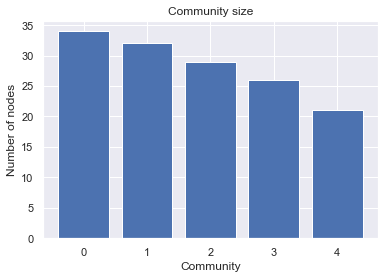

In [55]:
plt.bar(community_index, number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")
plt.title("Community size")

In [56]:
groups = dict()
for i, nodes in enumerate(community_sets_greedy):
    groups[i] = nodes

In [57]:
groups.keys() # large communities

dict_keys([0, 1, 2, 3, 4])

In [163]:
print("Network overall transitivity: ",nx.transitivity(graf))
print("Network overall density: ",nx.density(graf))
print("Country with the most cohesive neighbourhood: ",
      sorted(nx.clustering(graf).items(),
                        key = lambda x:x[1],reverse=True)[0])

print()
# We can test this by calculating the density of the network and the community.
# the network between characters in a community is more dense than the original network.
density_network = nx.density(graf)
for i, comm in groups.items():
    subgraph = G_un.subgraph(comm)
    
    print("Community", i+1 )
    
    print("Size:", subgraph.order())
          
    ave_degree = sum([i[1] for i in list(nx.degree(subgraph))])/subgraph.order()
    print("Average degree: ", ave_degree)
    
    dens = nx.density(subgraph)
    print("Density :", dens)
    print("Density ratio: ", dens / density_network)
    
    print("Transitivity community" ,nx.transitivity(subgraph))
    print("Country with the most cohesive neighbourhood: ",sorted(nx.clustering(subgraph).items(),
                        key = lambda x:x[1],
                        reverse=True)[0])
    print( "N. Triangles :",
          sum(nx.triangles(nx.to_undirected(subgraph)).values()),
          *sorted([i for i in nx.triangles(nx.to_undirected(subgraph)).items() if i[1]>0], key = lambda x: -x[1])[:2])
    print("-------------------------------------------")

Network overall transitivity:  0.04308093994778068
Network overall density:  0.03116571771051843
Country with the most cohesive neighbourhood:  ('Eritrea', 0.5)

Community 1
Size: 34
Average degree:  5.235294117647059
Density : 0.1586452762923351
Density ratio:  5.090377759495406
Transitivity community 0.22477064220183487
Country with the most cohesive neighbourhood:  ('Congo, Rep.', 1.0)
N. Triangles : 147 ('Vietnam', 18) ('Japan', 16)
-------------------------------------------
Community 2
Size: 32
Average degree:  5.375
Density : 0.17338709677419356
Density ratio:  5.563391749379653
Transitivity community 0.259567387687188
Country with the most cohesive neighbourhood:  ('Qatar', 1.0)
N. Triangles : 156 ('Brazil', 25) ('Argentina', 24)
-------------------------------------------
Community 3
Size: 29
Average degree:  5.0344827586206895
Density : 0.17980295566502463
Density ratio:  5.769254452444107
Transitivity community 0.2072936660268714
Country with the most cohesive neighbourhood:

In [96]:
IN = dict()
OUT = dict()
for i, comm in groups.items():
    subgraph = graf.subgraph(comm)
    
    IN[str(i+1)] = [el for el in dict(subgraph.in_degree()).values() if el!=0]
    OUT[str(i+1)] = [el for el in dict(subgraph.out_degree()).values() if el!=0]

In [95]:
for i, comm in groups.items():
    subgraph = graf.subgraph(comm)
    print(nx.reciprocity(subgraph))

0.04395604395604396
0.022988505747126436
0.0
0.0
0.0


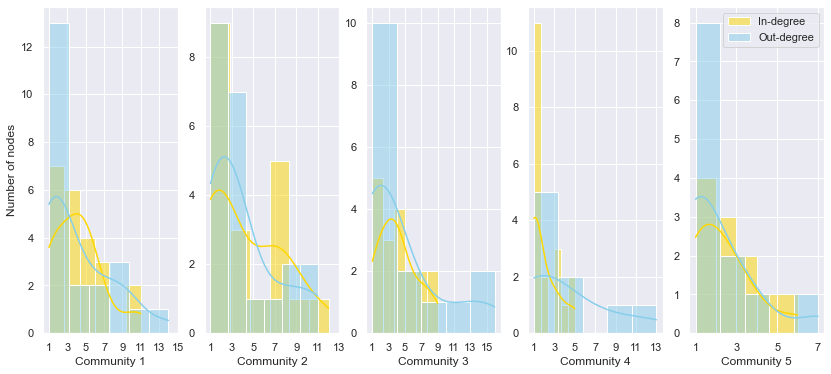

In [109]:
#df =pd.DataFrame({"In-degree":indegree, "Out-degree":outdegree, "random":random_degree})
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,5, figsize=(14, 6))
sns.histplot(data=IN, x="1", kde=True, color="gold",label="Seller",ax=axs[0])
sns.histplot(data=OUT, x="1", kde=True, color="Skyblue", label="Buyer",ax=axs[0])
sns.histplot(data=IN, x="2",  kde=True, color="gold", label="Seller",ax=axs[1])
sns.histplot(data=OUT, x="2",  kde=True, color="Skyblue",label="Buyer", ax=axs[1])
sns.histplot(data=IN, x="3",  kde=True, color="gold", label="Seller",ax=axs[2])
sns.histplot(data=OUT, x="3",  kde=True, color="Skyblue",label="Buyer", ax=axs[2])
sns.histplot(data=IN, x="4",  kde=True, color="gold", label="Seller",ax=axs[3])
sns.histplot(data=OUT, x="4",  kde=True, color="Skyblue",label="Buyer", ax=axs[3])
sns.histplot(data=IN, x="5",  kde=True, color="gold", label="In-degree",ax=axs[4])
sns.histplot(data=OUT, x="5",  kde=True, color="Skyblue",label="Out-degree", ax=axs[4])
axs[0].set_xticks(np.arange(1, 16, step=2))
axs[1].set_xticks(np.arange(1, 14, step=2))
axs[2].set_xticks(np.arange(1, 16, step=2))
axs[3].set_xticks(np.arange(1, 14, step=2))
axs[4].set_xticks(np.arange(1, 8, step=2))
plt.legend()
axs[0].set_ylabel("Number of nodes")
axs[1].set_ylabel("")
axs[2].set_ylabel("")
axs[3].set_ylabel("")
axs[4].set_ylabel("")
axs[0].set_xlabel("Community 1")
axs[1].set_xlabel("Community 2")
axs[2].set_xlabel("Community 3")
axs[3].set_xlabel("Community 4")
axs[4].set_xlabel("Community 5")

plt.savefig("Comm_degree_distr.png")

In [93]:
# Prevalence of continents
for key, states in groups.items():
    freq = np.unique([graf.nodes[state]["Continent"] for state in states], return_counts=True)    
    print("Community", key, *sorted([i for i in zip(freq[0], freq[1])], key=lambda x:-x[1]))

Community 0 ('Asia', 16) ('Europe', 11) ('Africa', 4) ('Australia', 2) ('North America', 1)
Community 1 ('Europe', 9) ('South America', 9) ('North America', 8) ('Africa', 3) ('Asia', 2) ('Australia', 1)
Community 2 ('Africa', 18) ('Europe', 7) ('Asia', 2) ('North America', 2)
Community 3 ('Africa', 12) ('Europe', 5) ('Asia', 4) ('North America', 3) ('South America', 2)
Community 4 ('Africa', 8) ('Asia', 6) ('Europe', 5) ('Australia', 1) ('North America', 1)


## Centrality in communities (GREEDY)

In [58]:
M_seller = dict()
M_buyer = dict()
M_inter = dict()
degree_com = {}
out_degree_com = {}
in_degree_com = {}
betweenness_com = {}
closeness_com = {}

# node -> centrality in the community subgraph

for i, comm in groups.items():
    subgraph = graf.subgraph(comm)
    
    
    print("Community: ", i+1)
    
    degree_centrality  = nx.degree_centrality(subgraph)
    for n,d in degree_centrality.items():
        degree_com[n] = d
        
    hub_degree = sorted(degree_centrality.items(), key = lambda x:x[1], reverse=True)[0:2]
    print('Major traider:',hub_degree)
    
    
    in_degree_centrality  = nx.in_degree_centrality(subgraph)
    for n,d in in_degree_centrality.items():
        in_degree_com[n] = d
        
    hub_degree = sorted(in_degree_centrality.items(), key = lambda x:x[1], reverse=True)[0:2]
    M_seller[hub_degree[0][0]] = list(nx.triadic_census(subgraph, [hub_degree[0][0]]).values())[:9]
    M_seller[hub_degree[1][0]] = list(nx.triadic_census(subgraph, [hub_degree[1][0]]).values())[:9]
    print('Major seller:',hub_degree)
    
    out_degree_centrality  = nx.out_degree_centrality(subgraph)
    for n,d in out_degree_centrality.items():
        out_degree_com[n] = d
        
    hub_degree = sorted(out_degree_centrality.items(), key = lambda x:x[1], reverse=True)[0:2]
    M_buyer[hub_degree[0][0]] = list(nx.triadic_census(subgraph, [hub_degree[0][0]]).values())[:9]
    M_buyer[hub_degree[1][0]] = list(nx.triadic_census(subgraph, [hub_degree[1][0]]).values())[:9]
    print('Major buyer:',hub_degree)
    
    
    bet_centrality  = nx.betweenness_centrality(subgraph)
    for n,b in bet_centrality.items():
        betweenness_com[n] = b
        
    hub_between = sorted(bet_centrality.items(), key = lambda x:x[1], reverse=True)[0]
    M_inter[hub_between[0]] = list(nx.triadic_census(subgraph, [hub_between[0]]).values())[:9]
    print('betweenness: ',sorted(bet_centrality.items(), key = lambda x:x[1], reverse=True)[:2])
    
    close_centrality  = nx.closeness_centrality(subgraph)
    for n,b in close_centrality.items():
        closeness_com[n] = b
        
    hub_close = sorted(close_centrality.items(), key = lambda x:x[1], reverse=True)[0]
    M_inter[hub_close[0]] = list(nx.triadic_census(subgraph, [hub_close[0]]).values())[:9]
    print('closeness: ',sorted(close_centrality.items(), key = lambda x:x[1], reverse=True)[:2])
    

    print("------------")

Community:  1
Major traider: [('Singapore', 0.42424242424242425), ('India', 0.42424242424242425)]
Major seller: [('Russia', 0.33333333333333337), ('Ukraine', 0.30303030303030304)]
Major buyer: [('Singapore', 0.42424242424242425), ('Japan', 0.30303030303030304)]
betweenness:  [('India', 0.16546717171717173), ('Thailand', 0.14924242424242423)]
closeness:  [('Russia', 0.34265734265734266), ('Thailand', 0.3340909090909091)]
------------
Community:  2
Major traider: [('Brazil', 0.4838709677419355), ('Argentina', 0.3870967741935484)]
Major seller: [('Brazil', 0.3870967741935484), ('Uruguay', 0.3225806451612903)]
Major buyer: [('Netherlands', 0.3548387096774194), ('Canada', 0.3548387096774194)]
betweenness:  [('Brazil', 0.02204301075268817), ('Uruguay', 0.015053763440860214)]
closeness:  [('Brazil', 0.3894009216589862), ('Uruguay', 0.35125448028673834)]
------------
Community:  3
Major traider: [('United Kingdom', 0.5714285714285714), ('United States', 0.5)]
Major seller: [('Congo, Dem. Rep.'

In [96]:
# Coherence between centrality measures (rankings)
def correlation_centrality(G):
    cor = pd.DataFrame.from_records(
        [degree_comm, out_degree_comm, in_degree_comm, betweenness_comm, closeness_comm], index=[
        "degree","out_degree","in_degree","betweenness","closeness"])
    return cor.T.corr()
correlation_centrality(graf)

,degree,out_degree,in_degree,betweenness,closeness
degree,1.000000,0.729663,0.465667,0.411555,0.366803
out_degree,0.729663,1.000000,-0.265361,0.226732,-0.296691
in_degree,0.465667,-0.265361,1.000000,0.286852,0.901150
betweenness,0.411555,0.226732,0.286852,1.000000,0.389414
closeness,0.366803,-0.296691,0.901150,0.389414,1.000000


 Motifs are better observable at a global level, because most interesting interactions occure among members of different communities. This is particulary true for great intermediaries, such as China.
 However, just to observe the patterns at community level we can notice some peculiarities.
 Motif 3 (reciprocated relation) only for communities 1&2
 Community 2 has more important vendors: resulting in recurrent motif 5
 China is the bridge among communities, in fact we can see it is main intermediary but on the global level only
 it is ill represented in the partition.

In [44]:

for i, comm in groups.items():
    subgraph = graf.subgraph(comm)
    print(list(nx.triadic_census(subgraph).values()))

[3741, 1647, 40, 232, 165, 89, 10, 11, 44, 2, 0, 1, 0, 2, 0, 0]
[2929, 1511, 23, 186, 201, 53, 5, 0, 50, 0, 0, 2, 0, 0, 0, 0]
[2168, 1037, 0, 274, 125, 14, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0]
[1892, 516, 0, 123, 25, 32, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0]
[912, 345, 0, 31, 27, 12, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]


## Triadic motifs analysis at global level

We analize the partition of the economic network performed by the greedy algorithm. We compute the centrality metrics on nodes within each community:
* From indegree ranking we can derive top sellers;
* From outdegree ranking we derive top buyers;
* States that perform as intermediaries in most economic transactions display high betweenness centrality.

From the three ahorementioned sets we analyze the motifs patterns separatelly for the group of main sellers and main buyers within five communities. Two considerations worth notice:
1) Overall, triads with 1 seller and two buyers or one buyer and two sellers(exporters sharing a common buyer) are very frequent;

2) States identified as intermediaries according to betweenness centrality are the only nodes featuring in patterns 6 and 9.

# Visualizing communities

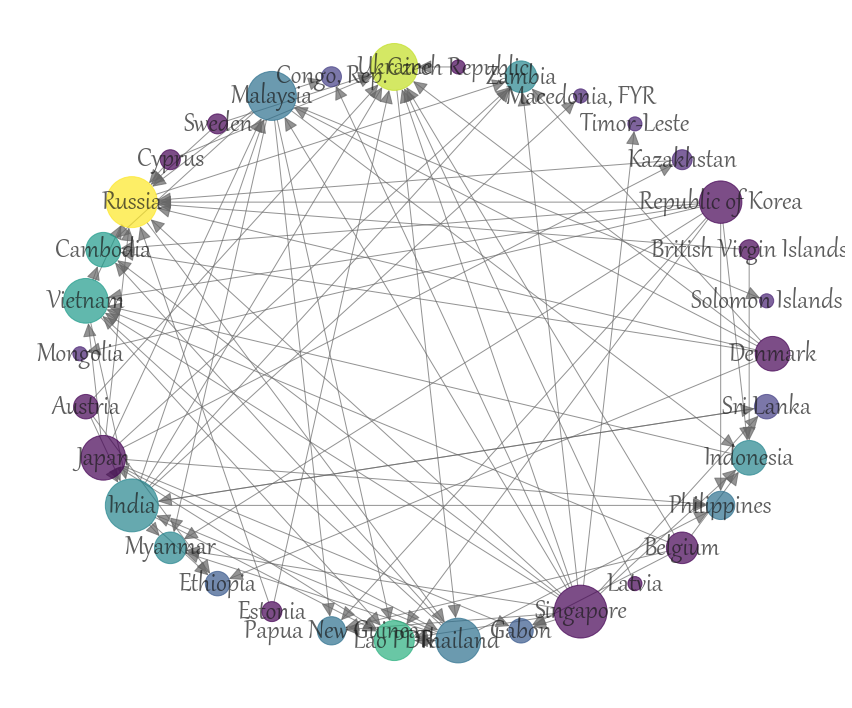

In [86]:
# fixing the size of the figure
s= nx.subgraph(graf, community_sets_greedy[0])
plt.figure(figsize =(12, 10))
  
node_color = [s.in_degree(v) for v in s]
# node colour is a list of degrees of nodes
  
node_size = [s.degree(v)*200 for v in s]
# size of node is a list of population of cities
  
pos = nx.circular_layout(s) 
nx.draw_networkx(s, node_size = node_size, arrowsize = 30,
                 node_color = node_color, alpha = 0.7,
                 with_labels = True, width=1, 
                 font_family = "gabriola", font_size= 30,
                 edge_color ='.4', pos=pos, cmap = plt.cm.viridis)
  
plt.axis('off')
plt.tight_layout();

In [115]:
nx.set_node_attributes(g, degree_communities, "degree_community")
nx.set_node_attributes(g, eigenvector_communities, "eigen_community")
nx.set_node_attributes(g, betweenness_communities, "between_community")
nx.set_node_attributes(g, betweenness_communities, "closeness_community")

# Evaluate communities

The coverage of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.
The performance of a partition is the ratio of the number of intra-community edges plus inter-community non-edges with the total number of potential edges.

In [91]:
method_names = ["Greedy","Louvain library"]

for i,my_list in enumerate([list_community_sets_greedy,  louvain]):
    
    print(method_names[i])
    print()
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G_un, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G_un, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(G_un, my_list))
    
    print("------------------------------------------------------------")
    print()

Greedy

Coverage 0.5032258064516129
Modularity 0.2796709157127991
Performance 0.8008190989911098
------------------------------------------------------------

Louvain library

Coverage 0.4532258064516129
Modularity 0.27738423517169614
Performance 0.8288882229547497
------------------------------------------------------------

